# Tutorial 1: Exploratory Data Analysis

The first step in any data science project is to get a good understanding of the data we're dealing with. The so called exploratory data analysis (EDA). The goal of an EDA is to 

- Get an understanding of the data and the underlying distributions
- Verify that the assumptions made in the business requirements hold. 

In particular, we need to check if the envisioned use case is actually feasible with the data available.
I.e. do we feel confident about identifiying whales based on the data we have?

*Notes: *
- *If this is your first Jupyter Notebook you might want to read [a general introduction](https://realpython.com/jupyter-notebook-introduction/) first.*
- *Do not be afraid to ask (and answer) questions! Check out the [teams channel](https://teams.microsoft.com/l/channel/19%3ac7745f3ce3844cbc9242ee91cedb2517%40thread.skype/Tutorial%25201%2520EDA?groupId=7d77d672-dff1-4c9f-ac55-3c837c1bebf9&tenantId=76a2ae5a-9f00-4f6b-95ed-5d33d77c4d61).*


### Table of contents:

[1. Setting up Python](#section1) <br>
[2. How to approach an Exploratory Data Analysis](#section2) <br>
&emsp; [2.1. How many images do we have?](#section2.1) <br>
&emsp; [2.2. How many different whales exist?](#section2.2) <br>
&emsp; [2.3. Cleaning the data](#section2.3) <br>
&emsp; [2.4. How many different whales are seen each year?](#section2.4) <br>
&emsp; [2.5. How many new whales are seen each year?](#section2.5) <br>
&emsp; [2.6. How many images do we have for each whale?](#section2.6) <br>
&emsp; [2.7. Summary](#section2.7) <br>
[3. Measuring prediction quality](#section3) <br>
&emsp; [3.1. How to create a submission file](#section3.1) <br>
&emsp; [3.2. Computing the score](#section3.2) <br>
&emsp; [3.3. The math behind the score function](#section3.3) <br>
&emsp; [3.4. Summary](#section3.4) <br>

<a id='section1'></a>
# Setting up Python
[Python](https://xkcd.com/353/) is not only one of the [most popular progamming languages](https://insights.stackoverflow.com/survey/2019), it is also the [main programming language for AI applications](https://medium.com/analytics-vidhya/evolution-of-a-kaggler-2019-ml-ds-survey-1903610ab67a). We'll use it throughout the tutorials. Even if you have no prior experience, you should be able to understand the main points. For a more thorough introduction, there are many good online courses, e.g. the one by [DataCamp](https://www.datacamp.com/courses/intro-to-python-for-data-science).

If you haven't already installed Python, please follow the instructions in our [wiki](http://de-mucingode1.corp.capgemini.com/gitlab/SophieY/global_data_science_challenge_3_public/-/wikis/Installation-Guide-for-Python-Anaconda-Distribution).  
If everything went well, you should be able to run the commands below without errors.

Later in this tutorial, we'll load data from our hard drives and load custom functions. In order for this to work, we need to change the working directory of jupyter notebook, i.e. the directory, from which jupyter notebook is running, is the same as the project home directory. This can be checked with the *pwd* (print-working-directory) command.
To run a cell, first click on it and then press **ctrl+enter**. 

In [2]:
%pwd

'C:\\VuNguyen\\Study\\Capgemini data science challenge 2020\\Notebooks'

This should show something along the lines of 
```
'C:\\Users\\YourName\\PycharmProjects\\global_data_science_challenge_3\\notebooks'
```
We need to change the working directory to the root directory of the project, i.e.
```
'C:\\Users\\YourName\\PycharmProjects\\global_data_science_challenge_3'
```

This can be done with the *cd ..* (change directory to the parent directory) command:

In [3]:
%cd ..

C:\VuNguyen\Study\Capgemini data science challenge 2020


Be careful to only run the above cell once. Otherwise you will traverse further down the folder structure. 

#### Importing the Required Packages
The main power of Python comes from its many great libraries. We can import the libraries via

In [1]:
import matplotlib.pyplot as plt
import pandas as pd  
from pathlib import Path

A short description of the imports:
- **matplotlib.pyplot:** Matplotlib is the defaul plotting library for python. 
- **pathlib:** provides a way of using operating system dependent functionality such as working with with folders and files on your computer.
- **pandas:** Pandas is arguably the most well known Python library. It allows simple and convient data manipulation

<font color='blue'>
    
**Best practice:** 
- Define all required packages in requirements.txt.

<a id='section2'></a>
# How to approach an Exploratory Data Analysis

Lisa provided us her files and pictures from the years 2005 up until 2016. You can find it [here](https://gdsc.ce.capgemini.com/resources/). Download it, and put it in the data folder in a subfolder called *raw*. Your directory structure should look like this:

```
    ├── global_data_science_challenge_3
    │   │
    │   ├── data
    │   │   ├── raw
    │   │   │   ├── Whale Watch Azores 2005
    .   .   .   .
                └── Whale Watch Azores 2016          
```

You should have 12 folder,s each containing the data for one year, starting with 2005 and ending with 2016.
Each folder contains an excel file and images.

- Each image shows the fluke of a whale
- The excel files describe which whale can be seen in which image

We will use this data to train our machine learning model. Lisa also provides us with data for the years 2017 and 2018 which we will use for the evaluations.

Our goal is to get a good understanding of the data. Usually, you will start with some initial questions. The answers to these questions will raise more questions, and so on. The EDA is finished, when you run out of questions. 

For our problem, let's start with the following questions:
- How many images do we have?
- How many different whales exist?
- How many images do we have for each whale?

<a id='section2.1'></a>
## How many images do we have?

We could just answer this question by looking at each folder manually, but it also a great opportunity to get started with some basic python

In [4]:
raw_data_folder = Path('data/raw')
yearly_folders = list(raw_data_folder.glob('*'))

In [5]:
for year_folder in yearly_folders:
    files = len(list(year_folder.glob('*')))  # len returns the number of elements in a list
    print(f"There are {files} files in {year_folder}")

There are 445 files in data\raw\Whale Watch Azores 2005
There are 526 files in data\raw\Whale Watch Azores 2006
There are 497 files in data\raw\Whale Watch Azores 2007
There are 433 files in data\raw\Whale Watch Azores 2008
There are 364 files in data\raw\Whale Watch Azores 2009
There are 324 files in data\raw\Whale Watch Azores 2010
There are 395 files in data\raw\Whale Watch Azores 2011
There are 290 files in data\raw\Whale Watch Azores 2012
There are 249 files in data\raw\Whale Watch Azores 2013
There are 319 files in data\raw\Whale Watch Azores 2014
There are 367 files in data\raw\Whale Watch Azores 2015
There are 343 files in data\raw\Whale Watch Azores 2016


There is quite some variability between the individual years with the number ranging between 523 and 249. At first glance this might indicate a data error, maybe some images are missing. Such strange behaviours should always be discusssed with the business stakeholders. In our case the reason is twofold. 

- Firstly, whale watching is a seasonal activity and as such the weather has a big influence on the number of trips you can take. On rainy summer can mean very few trips, and hence fewer images. 
- Secondly, due to hardware constraints Lisa tends to keep very few images per individual per year. In early years, often only a single image. Hence the fewer individuals visit the island, the lower the number of total images.

These numbers aren't quite correct since some of the folders also have the excel files. So we would have to substract 1 from the the counts to get the number of image files.

**Excercise:**
- Change the above code to only count image files

**My exercise answer**  

In [6]:
for year_folder in yearly_folders:
    files = len(list(year_folder.glob('*.jpg')))  # len returns the number of elements in a list
    print(f"There are {files} files in {year_folder}")

There are 444 files in data\raw\Whale Watch Azores 2005
There are 518 files in data\raw\Whale Watch Azores 2006
There are 495 files in data\raw\Whale Watch Azores 2007
There are 432 files in data\raw\Whale Watch Azores 2008
There are 363 files in data\raw\Whale Watch Azores 2009
There are 323 files in data\raw\Whale Watch Azores 2010
There are 394 files in data\raw\Whale Watch Azores 2011
There are 289 files in data\raw\Whale Watch Azores 2012
There are 248 files in data\raw\Whale Watch Azores 2013
There are 318 files in data\raw\Whale Watch Azores 2014
There are 366 files in data\raw\Whale Watch Azores 2015
There are 342 files in data\raw\Whale Watch Azores 2016


### A picture is worth a thousand words
Plots are a great way to convey information. If done properly, a good plot allows the reader to [easily understand complex situations](https://en.wikipedia.org/w/index.php?title=Charles_Joseph_Minard#The_map_of_Napoleon's_Russian_campaign). 
Matplotlib allows you to create almost any graph imaginable. Check out the awesome [documentation](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html) and [examples](https://matplotlib.org/3.1.1/gallery/index.html) for inspiration.

We'll start with a plot of the number of files per year.

In [7]:
# The following line allows us to display the plots directly in the notebook.
%matplotlib inline  
plt.style.use('seaborn-poster')  # Which style to use, purely cosmetic

First, we need to store the data that we want to display. For this we create a list that contains the number of files for each year.

In [8]:
file_counts = []  # Create an empty list
for year_folder in yearly_folders:
    files = len(list(year_folder.glob('*')))  # len returns the number of elements in a list
    file_counts.append(files)  # Add a new element to the list

In [9]:
file_counts  # Shows the value of a variable

[445, 526, 497, 433, 364, 324, 395, 290, 249, 319, 367, 343]

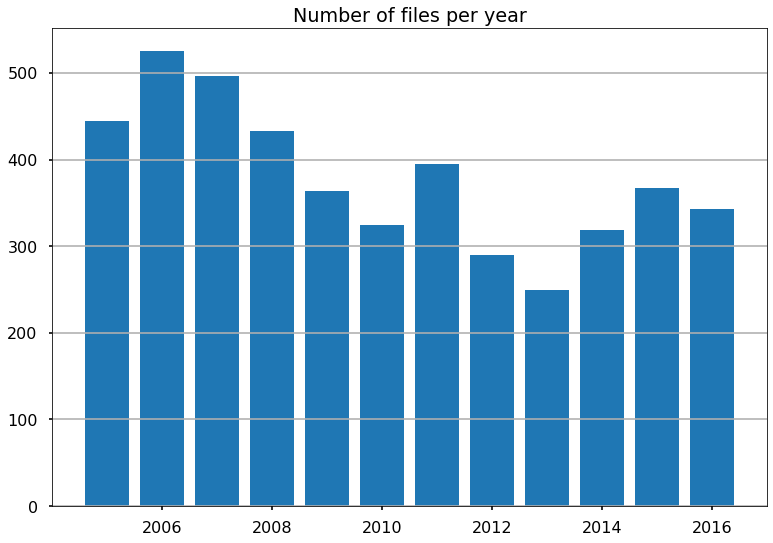

In [12]:
#plt.bar(yearly_folders, file_counts)  # plt.bar is for creating bar charts.
plt.bar(range(2005, 2017), file_counts)  # plt.bar is for creating bar charts.
plt.title("Number of files per year")  # The title of the plot. Will be shown over the image
plt.grid(axis="y") # We want a grind on the y-axis
plt.show()  # Actually creates the plot

Arguably, the difference between the pictures per year that we noted earlier can be easier grasped in this graph.

**Excercise:**
- Improve the labels on the x-axis by showing only the years. This can be done with the range function: range(2005, 2017)
- Try out different styles and plot types. Which one is the best for our data?

<font color='blue'>

**Best practice:** 
- Discuss uncommon behaviours and outliers that you find during the EDA with your business stakeholders
- Keep your data in one place, e.g. in the /data subfolder
- Always keep a *raw*, meaning unaltered, copy of your data

<a id='section2.2'></a>
## How many different whales exist?

In theory, the excel files tell us which whale can be seen in which image. The first column contains the ID of the whale,
the following columns the images in which this whale was seen. For example the excel file from 2005 includes the following entries:

Whale id | First image | Second image | ... 
:--- | :---: | :---: | :---:
1756 | IMG_2270-16 |      | ... 
2824 | PM-WWA-20050413-003a | PM-WWA-20050413-028 | ... 

I.e. the whale with ID *1756* can be seen in the image with the filename *IMG_2270-16*. The images *PM-WWA-20050413-003a* and 
*PM-WWA-20050413-028* both show the whale with the ID *2824*. So we should have a clear mapping between ids and images that we should be able to parse without much trouble. But as it turns out things aren't that simple. Below are some examples that are not that easy to understand:

Whale id | First image | Second image | Third image | ...
:--- |:---:|:---:| :---:| :---:
**-1** | PM-WWA-20050416-037 | ... | ... | ...
**Bad Pic** |PM-WWA-20050620-042 | ... |... | ...
**2929 X** | PM-WWA-20050706-223 (big scallop/nick rt side scallop center left) X | PM-WWA-20050707-275 X | PM-WWA-20050708-380 **X** | PM-WWA-20050709-231 X | PM-WWA-20050709-231 X
**2402 (was 3059)** | PM-WWA-20090630-11 (qua 3) | PM-WWA-20090630-49 (qua 3)| PM-WWA-20090630-62 (qua 4) | ...
**No Match** | PM-WWA-20050731-158 | ... | ... | ...
**Nike 2628** |	PM-WWA-20060818-151| ... | ... | ...
**2529 Wht Spt Notch** | PM-WWA-20050612-33 | PM-WWA-20050619-180 | ... | ...
**WWA-20130724-335** |	20180612-018 | FUT-2013-PM237 | ... | ...
**20130907-A134** | 20160725-063 | ... | ... | ...
**2005-3007-068** | PM-WWA-20110604-012 | ... | ... | ...
**2234  friend of 1198** | 20140903-110 | 20140904-086 | 20140904-273 | 20140919-012
**cf of 3529**  | 20150806-007b | 20150806-008  | ... | ... | ...
**19's calf from 2007 3397?** | 20160429-347 | 20160429-369 | PM-WWA-20070703-112 | ...
**Adirondack - Terra Azul 2011** | WWA-20130531-005 | ... | ... | ...

As you can see there are all kinds of exceptions. E.g.

* **-1** and **Bad Pic** both denote that the image quality is too bad for identification
* **2929 X** is the id 2929, the X says that Lisa was very excited to see this whale.
* **No Match** means this is the first time this whale was seen
* **cf of 3529** explains that this picture shows the calf of 3529
* **Nike** is the nickname of this whale that doubles as an id
* **20130907-A134** refers to an older image that shows the same whale. 

Similary, the image names are hard to parse and even harder to match to the existing files 

* All images are missing the file extension. Luckily most of them are *.jpg*.
* Most images have the format *PM-WWA-DATE-NUMBER*, e.g. *PM-WWA-20050416-037*. Both prefixes can be skipped, e.g. *20180612-018* and *WWA-20130621-033*
* In the format, *PM-WWA-DATE-NUMBER* the NUMBER may nor may not be padded with a 0, e.g. *PM-WWA-20090630-62* and *PM-WWA-20110604-012*
* and of course there can be typos

<a id='section2.3'></a>
### Cleaning the data
The examples show that we will need to clean the data. This could either be done by manually editing the excel files, or by writing some code that does the cleaning for us. 

Most of the exceptions like *id + x*, *Bad Pic* or *No Match* can be easily filtered. In the other cases you have to figure out if the problem is common enough to fix it in code or if it appears just once so its easier to fix the data.
Most of the more common problems, like dates, calf of and names, can be recognised by [regular expressions](https://en.wikipedia.org/wiki/Regular_expression). Sometimes regular expressions are not enough to identify the whale id. In that case it can be helpful to further filter the informations with if conditions and wordlists.  
In cases that the raw id is an reference to older images, you have to format the the parsed date first and then try to find a match in the already processed images to get the correct id. 

Whenever possible you should aim to avoid manual edits. They are error prone and make it very hard to track what exactly has been changed. If you must do manual cleaning, always make a copy and edit only the copy. 

We created some code that cleans the data for us. It is stored in the file *make_dataset.py* in the subfolder *src/data*. *make_dataset.py* contains one function called *sort_yearly_folder* that takes a folder and provides us with mappings betweens whale ids and images. Let's try it out.

In [13]:
from src.data.make_dataset import sort_yearly_folder
data_folder = raw_data_folder / 'Whale Watch Azores 2005'
id_to_images, image_to_id, base_id = sort_yearly_folder(str(data_folder))

2020-02-21 09:21:33,739 make_dataset sort_yearly_folder line 367 Sorting data\raw\Whale Watch Azores 2005
2020-02-21 09:21:34,109 make_dataset parse_excel line 265 Parsing data\raw\Whale Watch Azores 2005\Sperm Whale Matches 2005.xlsx
2020-02-21 09:21:34,352 make_dataset parse_excel line 288 No image at row 176 for ID 1543, ['PM-WWA-20050628-082']
2020-02-21 09:21:34,372 make_dataset parse_excel line 288 No image at row 184 for ID 2535, ['PM-WWA-20050701-106 ', 'PM-WWA-20050701-118', '1/2 TAIL']
2020-02-21 09:21:34,382 make_dataset parse_excel line 288 No image at row 185 for ID 1543, ['PM-WWA-20050701-108', ' 1/2 TAIL GP']
2020-02-21 09:21:34,641 make_dataset parse_excel line 288 No image at row 239 for ID 2929, ['PM-WWA-20050708-380 (big scallop/nick rt side scallop center left)', 'PM-WWA-20050706-223 ']
2020-02-21 09:21:34,702 make_dataset parse_excel line 288 No image at row 270 for ID 2579, ['PM-WWA-20050712-002 (Wht Head)', 'PM-WWA-20050712-062']
2020-02-21 09:21:34,708 make_data

The output tells us which folder and file is being parsed. It also reports multiple errors in the excel files. The rows list an ID and an image, but the image does not exist. We verified with Lisa that this error is due to the way early sightings were recorded and can be ignored. The same holds for errors that *sort_yearly_folder* reports.

*sort_yearly_folder* return three different values:

- *id_to_images:* is a dictionary that maps whale IDs to a set of all images for the respective whale. Sets in python are collections of elements, which are unique and unordered (meaning they appear in a random order).
- *image_to_id:* is a dictionary that maps images to the corresponding whale ID. Every image corresponds to exactly one whale ID, but different images could correspond to the same whale ID.
-  *base_id:* A picture that does not already have an assigned ID is automatically assigned a new value, starting with 5000. The next free ID is returned as the *base_id*.

In [14]:
id_to_images  #It's often simpler to just look at a variable

{'1756': {'data\\raw\\Whale Watch Azores 2005\\IMG_2270-16.jpg'},
 '2824': {'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-003a.jpg'},
 '2764': {'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-003b.jpg',
  'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-029.jpg'},
 '2825': {'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-006.jpg',
  'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-007.jpg'},
 '2826': {'data\\raw\\Whale Watch Azores 2005\\PM-BIO-20050413-049.jpg',
  'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-009.jpg'},
 '2827': {'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-012.jpg'},
 '2828': {'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-025.jpg',
  'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-026.jpg'},
 '2830': {'data\\raw\\Whale Watch Azores 2005\\PM-BIO-20050414-116.jpg'},
 '2829': {'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050414-096.jpg'},
 '2831': {'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050415-081.jpg'},
 '2832

In [17]:
image_to_id

{'data\\raw\\Whale Watch Azores 2005\\IMG_2270-16.jpg': '1756',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-003a.jpg': '2824',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-003b.jpg': '2764',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-029.jpg': '2764',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-006.jpg': '2825',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-007.jpg': '2825',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-009.jpg': '2826',
 'data\\raw\\Whale Watch Azores 2005\\PM-BIO-20050413-049.jpg': '2826',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-012.jpg': '2827',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-025.jpg': '2828',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050413-026.jpg': '2828',
 'data\\raw\\Whale Watch Azores 2005\\PM-BIO-20050414-116.jpg': '2830',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050414-096.jpg': '2829',
 'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050415-081.jpg': '2831'

In [18]:
base_id

5001

Images that have no match get assigned a new ID starting with 5000. Since the new *base_id* is 5001 we had to assign one new ID for this year. To see which image(s) got assinged to this ID we can type:

In [19]:
id_to_images['5000']

{'data\\raw\\Whale Watch Azores 2005\\PM-WWA-20050731-158.jpg'}

We can check the excel to see that the ID column contains the value *No Match* for this picture. Hence assigning it a new ID was the right choice.

*Note:*
- We used the above functionality to sort the data by IDs. You can find the sorted data [here](https://capgemini.sharepoint.com/sites/GlobalDataScienceChallenge806/Shared%20Documents/Data%20Discussions/train.zip).

**Excercise:**
- Open the file *src/data/make_dataset.py* in an editor of your choice and read through it.

<font color='blue'>

**Best practice:**
- Don't underestimate the effort it takes to clean your data. Usually, around 80% of the time of a Data Science project goes into this phase.
- Keep track of all the changes you make to your data. Tools like DVC (https://dvc.org/) can help.

<a id='section2.4'></a>
### How many different whales are seen each year?

The number of entries in *id_to_images* is the number of whales that were seen in the respective year.

In [15]:
len(id_to_images)  # len shows the number of keys in a dictionary

290

We can reuse our previous code to plot the number of whales per year.

In [16]:
id_counts = []
for year_folder in yearly_folders:
    id_to_images, image_to_id, _ = sort_yearly_folder(str(year_folder))
    id_count = len(id_to_images)
    id_counts.append(id_count)

2020-02-21 09:31:27,317 make_dataset sort_yearly_folder line 367 Sorting data\raw\Whale Watch Azores 2005
2020-02-21 09:31:27,432 make_dataset parse_excel line 265 Parsing data\raw\Whale Watch Azores 2005\Sperm Whale Matches 2005.xlsx
2020-02-21 09:31:27,690 make_dataset parse_excel line 288 No image at row 176 for ID 1543, ['PM-WWA-20050628-082']
2020-02-21 09:31:27,718 make_dataset parse_excel line 288 No image at row 184 for ID 2535, ['PM-WWA-20050701-106 ', 'PM-WWA-20050701-118', '1/2 TAIL']
2020-02-21 09:31:27,732 make_dataset parse_excel line 288 No image at row 185 for ID 1543, ['PM-WWA-20050701-108', ' 1/2 TAIL GP']
2020-02-21 09:31:27,902 make_dataset parse_excel line 288 No image at row 239 for ID 2929, ['PM-WWA-20050708-380 (big scallop/nick rt side scallop center left)', 'PM-WWA-20050706-223 ']
2020-02-21 09:31:28,036 make_dataset parse_excel line 288 No image at row 270 for ID 2579, ['PM-WWA-20050712-002 (Wht Head)', 'PM-WWA-20050712-062']
2020-02-21 09:31:28,042 make_data

2020-02-21 09:31:32,353 make_dataset sort_yearly_folder line 367 Sorting data\raw\Whale Watch Azores 2007
2020-02-21 09:31:32,418 make_dataset parse_excel line 265 Parsing data\raw\Whale Watch Azores 2007\Sperm Whale Matches 2007.xlsx
2020-02-21 09:31:32,541 make_dataset parse_excel line 288 No image at row 75 for ID 2243, ['PM-WWA-20070504-05', '1996 1999']
2020-02-21 09:31:32,902 make_dataset parse_excel line 288 No image at row 258 for ID 1645, ['PM-WWA-20070628-193']
2020-02-21 09:31:32,976 make_dataset parse_excel line 288 No image at row 278 for ID 2500, ['PM-WWA-20070703-07', 'PM-WWA-20070703-90']
2020-02-21 09:31:33,026 make_dataset parse_excel line 288 No image at row 285 for ID 1645, ['PM-WWA-20070703-30', 'PM-WWA-20070628-193']
2020-02-21 09:31:33,036 make_dataset parse_excel line 288 No image at row 289 for ID 1592, ['PM-WWA-20070703-54']
2020-02-21 09:31:33,042 make_dataset parse_excel line 288 No image at row 290 for ID 3095, ['PM-WWA-20070703-58', 'PM-WWA-20070703-126']


2020-02-21 09:31:41,088 make_dataset get_id line 75 Missing reference to previous image: 20110601-065 => data\raw\Whale Watch Azores 2011\PM-WWA-20110601-065.jpg
2020-02-21 09:31:41,124 make_dataset get_id line 75 Missing reference to previous image: 20130708-220 => data\raw\Whale Watch Azores 2013\PM-WWA-20130708-220.jpg
2020-02-21 09:31:41,136 make_dataset get_id line 75 Missing reference to previous image: 20140702-021 => data\raw\Whale Watch Azores 2014\PM-WWA-20140702-021.jpg
2020-02-21 09:31:41,203 make_dataset get_id line 75 Missing reference to previous image: 20110724-098 => data\raw\Whale Watch Azores 2011\PM-WWA-20110724-098.jpg
2020-02-21 09:31:41,206 make_dataset get_id line 75 Missing reference to previous image: 20120806-126 => data\raw\Whale Watch Azores 2012\PM-WWA-20120806-126.jpg
2020-02-21 09:31:41,241 make_dataset get_id line 75 Missing reference to previous image: 20110411-014 => data\raw\Whale Watch Azores 2011\PM-WWA-20110411-014.jpg
2020-02-21 09:31:41,244 make

2020-02-21 09:31:42,118 make_dataset get_id line 75 Missing reference to previous image: 20110626-173 => data\raw\Whale Watch Azores 2011\PM-WWA-20110626-173.jpg
2020-02-21 09:31:42,120 make_dataset get_id line 75 Missing reference to previous image: 20110626-145 => data\raw\Whale Watch Azores 2011\PM-WWA-20110626-145.jpg
2020-02-21 09:31:42,218 make_dataset sort_yearly_folder line 390 0 images have no ID.


In [17]:
id_counts

[290, 231, 296, 337, 266, 222, 305, 231, 174, 248, 283, 273]

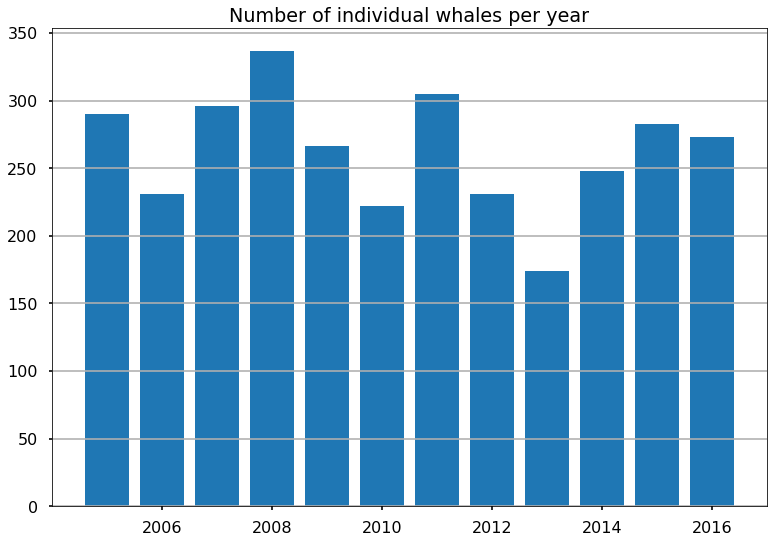

In [23]:
plt.bar(range(2005, 2017), id_counts) 
plt.title("Number of individual whales per year")  
plt.grid(axis="y")
plt.show()

With a bit more work, we can even show both graphs at once. To do this, we first create a DataFrame that contains all the information that we want to plot. If you haven't worked with DataFrames before, think of them as very powerful Excel-like tables.

In [20]:
df = pd.DataFrame(index=range(2005, 2017))
df['Nr. of files'] = file_counts
df['Nr. of whale IDs'] = id_counts
df.head()  # the .head() function shows the top 5 entries of an DataFrame.

,Nr. of files,Nr. of whale IDs
2005,445,290
2006,526,231
2007,497,296
2008,433,337
2009,364,266


We can then use the build-in plotting functionality:

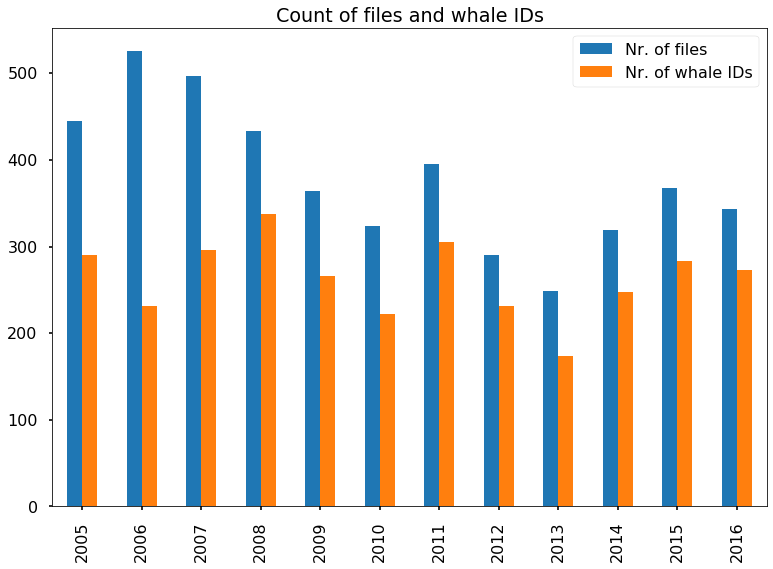

In [21]:
df.plot.bar(title='Count of files and whale IDs') 

While there is still quite some variance between the different years, it is less then when we considered only the number of images. On average there seem to be between 200 and 300 different whales that visit the azores every year. How many of these are repeated visitors?

It's also worth noting that the number of images is not that much higher than the number of whale ids. Due to storage and computation constraints, Lisa aims to keep the total number of imags low. For most whales, there will only be one picture per year. As AIs usually needs many examples to learn from, this will make it a bit harder.

<a id='section2.5'></a>
### How many new whales are seen each year?

You might have already noticed that some whale ids appear in multiple years. This raises the question how many of the whales that are seen in one year were also seen in previous years. 

In [19]:
new_whale_counts = []
returning_whale_counts = []
whale_ids_total = set() # all whale ids that we've seen so far
image_to_id = {} # all images seen so far
base_id = 5000 # base id as default value, not relevant for the computation

for year_folder in yearly_folders:   
    # Parse the image folder / xls for the current year 
    # id_to_image contains all the ids that were seen this year, 
    id_to_images, image_to_id, base_id = sort_yearly_folder(str(year_folder), image_to_id=image_to_id, base_id=base_id)
    
    # to get the new_whale_know id's you need to remove the amout of ids from in the last run
    whale_ids_this_year = set(id_to_images.keys())
    new_whales = whale_ids_this_year - whale_ids_total  # This is the difference between sets, not numbers!
    new_whale_counts.append(len(new_whales)) 

    # To overlap between new and old whale ids is the number of returning whales
    returning_whales = whale_ids_this_year.intersection(whale_ids_total)
    returning_whale_counts.append(len(returning_whales))
    
    # Update whale_ids with all the new whales we've seen so far
    whale_ids_total = whale_ids_total.union(whale_ids_this_year)    

2020-02-21 09:31:46,755 make_dataset sort_yearly_folder line 367 Sorting data\raw\Whale Watch Azores 2005
2020-02-21 09:31:46,880 make_dataset parse_excel line 265 Parsing data\raw\Whale Watch Azores 2005\Sperm Whale Matches 2005.xlsx
2020-02-21 09:31:47,188 make_dataset parse_excel line 288 No image at row 176 for ID 1543, ['PM-WWA-20050628-082']
2020-02-21 09:31:47,208 make_dataset parse_excel line 288 No image at row 184 for ID 2535, ['PM-WWA-20050701-106 ', 'PM-WWA-20050701-118', '1/2 TAIL']
2020-02-21 09:31:47,215 make_dataset parse_excel line 288 No image at row 185 for ID 1543, ['PM-WWA-20050701-108', ' 1/2 TAIL GP']
2020-02-21 09:31:47,322 make_dataset parse_excel line 288 No image at row 239 for ID 2929, ['PM-WWA-20050708-380 (big scallop/nick rt side scallop center left)', 'PM-WWA-20050706-223 ']
2020-02-21 09:31:47,372 make_dataset parse_excel line 288 No image at row 270 for ID 2579, ['PM-WWA-20050712-002 (Wht Head)', 'PM-WWA-20050712-062']
2020-02-21 09:31:47,377 make_data

2020-02-21 09:31:50,645 make_dataset sort_yearly_folder line 367 Sorting data\raw\Whale Watch Azores 2007
2020-02-21 09:31:50,705 make_dataset parse_excel line 265 Parsing data\raw\Whale Watch Azores 2007\Sperm Whale Matches 2007.xlsx
2020-02-21 09:31:50,835 make_dataset parse_excel line 288 No image at row 75 for ID 2243, ['PM-WWA-20070504-05', '1996 1999']
2020-02-21 09:31:51,266 make_dataset parse_excel line 288 No image at row 258 for ID 1645, ['PM-WWA-20070628-193']
2020-02-21 09:31:51,333 make_dataset parse_excel line 288 No image at row 278 for ID 2500, ['PM-WWA-20070703-07', 'PM-WWA-20070703-90']
2020-02-21 09:31:51,358 make_dataset parse_excel line 288 No image at row 285 for ID 1645, ['PM-WWA-20070703-30', 'PM-WWA-20070628-193']
2020-02-21 09:31:51,365 make_dataset parse_excel line 288 No image at row 289 for ID 1592, ['PM-WWA-20070703-54']
2020-02-21 09:31:51,372 make_dataset parse_excel line 288 No image at row 290 for ID 3095, ['PM-WWA-20070703-58', 'PM-WWA-20070703-126']


In [22]:
new_whale_counts

[290, 186, 234, 244, 176, 120, 194, 149, 122, 168, 185, 170]

In [23]:
returning_whale_counts

[0, 45, 62, 93, 90, 102, 110, 82, 52, 80, 96, 101]

In [24]:
df = pd.DataFrame(index=range(2005, 2017))
df['New whales'] = new_whale_counts
df['Returning whales'] = returning_whale_counts
df.head()

,New whales,Returning whales
2005,290,0
2006,186,45
2007,234,62
2008,244,93
2009,176,90


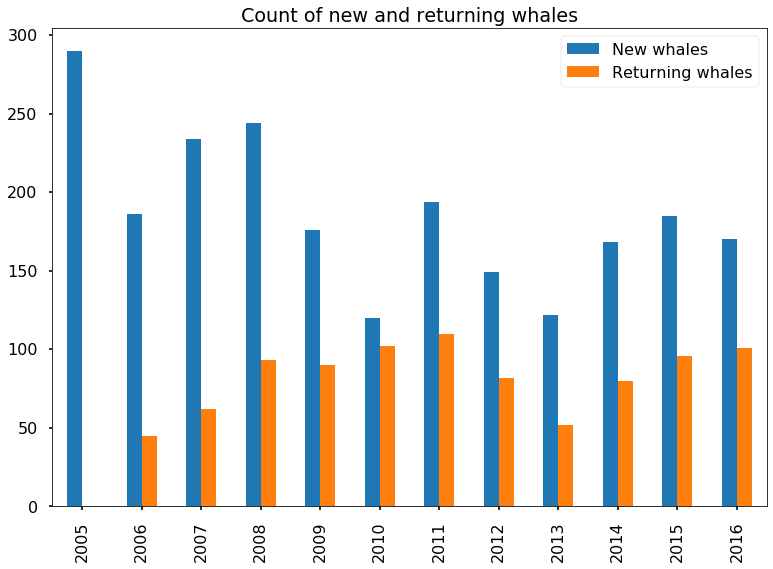

In [25]:
df.plot.bar(title='Count of new and returning whales')

In the first few years, the number of new whales dominates the number of the returning whales, as expected. What's surprising is that even after over 10 years we still see many new whales each year. In fact the number of new whales is always greater than the number of returning whales.

This either means that there are lots of new whales born each year, that the total population is much bigger than what we've seen so far, or that there are errors in our data. 

With a bit of math you can do serious population size estimation based on this kind of data. See for examples Lisa's [latest paper](https://gdsc.ce.capgemini.com/static/Multi-stateOpenRobustDesign_2019.pdf) on the topic.

**Note:**

The calcuation for the new and returning whales is based on only our dataset. Alternatively, we could treat all whales that already have an ID assigned as returning. In this case, we would already have many returning whales in 2005. 

**Excercise:**
- Compute the number of new and returning whales when treating all whales with assigned IDs and compare the results.

<a id='section2.6'></a>
## How many images do we have for each whale?

The number of images we have for each whale is essential. Imagine having to identify a person on the street after having seen only a mugshot of the same person. In general, it is even harder for *AI*s. They get better the more training data they have available. If we have only very few pictures of a whale, the AI will likely struggle to identify this whale.

Let's see how things look in our dataset.

We start by analysing a single year. As before we first compute the *id_to_images* dictionary.

In [26]:
data_folder = raw_data_folder / 'Whale Watch Azores 2007'
id_to_images, image_to_id, base_id = sort_yearly_folder(str(data_folder))

2020-02-09 21:34:33,064 make_dataset sort_yearly_folder line 367 Sorting data\raw\Whale Watch Azores 2007
2020-02-09 21:34:33,163 make_dataset parse_excel line 265 Parsing data\raw\Whale Watch Azores 2007\Sperm Whale Matches 2007.xlsx
2020-02-09 21:34:33,449 make_dataset parse_excel line 288 No image at row 75 for ID 2243, ['PM-WWA-20070504-05', '1996 1999']
2020-02-09 21:34:33,957 make_dataset parse_excel line 288 No image at row 258 for ID 1645, ['PM-WWA-20070628-193']
2020-02-09 21:34:34,014 make_dataset parse_excel line 288 No image at row 278 for ID 2500, ['PM-WWA-20070703-07', 'PM-WWA-20070703-90']
2020-02-09 21:34:34,049 make_dataset parse_excel line 288 No image at row 285 for ID 1645, ['PM-WWA-20070703-30', 'PM-WWA-20070628-193']
2020-02-09 21:34:34,060 make_dataset parse_excel line 288 No image at row 289 for ID 1592, ['PM-WWA-20070703-54']
2020-02-09 21:34:34,067 make_dataset parse_excel line 288 No image at row 290 for ID 3095, ['PM-WWA-20070703-58', 'PM-WWA-20070703-126']


Then we count the number of images for each id by looping over all ids

In [27]:
image_counts = []
for id in id_to_images:
    images = id_to_images[id]
    image_counts.append(len(images))

or we can use *list compression* to do the same computation faster. 

In [28]:
image_counts = [len(images) for images in id_to_images.values()]

As expected, most of the IDs only have one picture. Let's count how often each number occurs:

In [29]:
df = pd.DataFrame()
df['Nr of images'] = image_counts
df.head()

,Nr of images
0,1
1,1
2,1
3,43
4,1


In [30]:
df['Nr of images'].value_counts()  # the value_counts function tell you how often each value appears.

1     243
2      25
3       2
43      1
Name: Nr of images, dtype: int64

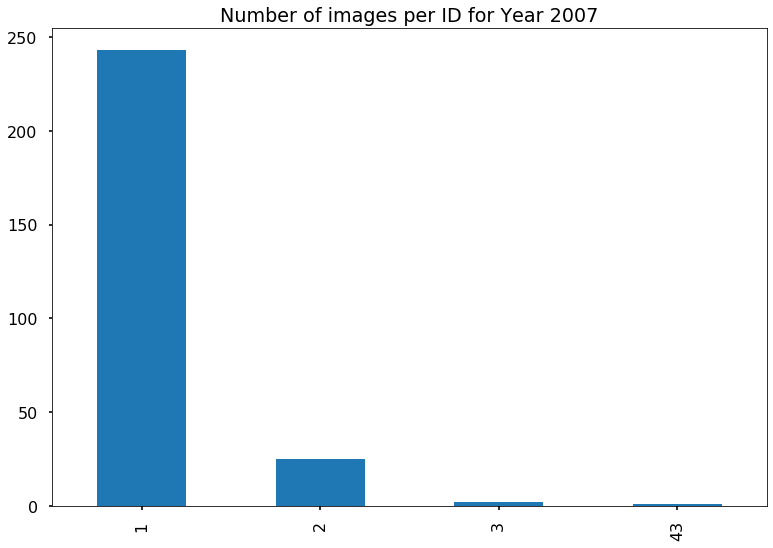

In [31]:
value_counts = df['Nr of images'].value_counts()
value_counts.plot(kind='bar', title='Number of images per ID for Year 2007')  # As before we use the build-in plotting function

Note that we have two outliers:

* 212 ids with only one picture
* one id with 39 pictures

You will find that the id *-1* which is used for bad pictures is the one with the 39 images. 

In total, things look pretty grim for an AI approach. The majority of ids has only one image, a handful two images and very few more than that. Luckily we have data for more than one year. Let's do the same computation for the complete dataset.

In [32]:
# Compute id_to_images for all years
for year_folder in yearly_folders:
    id_to_images, image_to_id, base_id = sort_yearly_folder(str(year_folder), id_to_images, image_to_id, base_id)

2020-02-20 14:08:47,425 make_dataset sort_yearly_folder line 367 Sorting data\raw\Whale Watch Azores 2005
2020-02-20 14:08:47,526 make_dataset parse_excel line 265 Parsing data\raw\Whale Watch Azores 2005\Sperm Whale Matches 2005.xlsx
2020-02-20 14:08:47,774 make_dataset parse_excel line 288 No image at row 176 for ID 1543, ['PM-WWA-20050628-082']
2020-02-20 14:08:47,798 make_dataset parse_excel line 288 No image at row 184 for ID 2535, ['PM-WWA-20050701-106 ', 'PM-WWA-20050701-118', '1/2 TAIL']
2020-02-20 14:08:47,805 make_dataset parse_excel line 288 No image at row 185 for ID 1543, ['PM-WWA-20050701-108', ' 1/2 TAIL GP']
2020-02-20 14:08:47,907 make_dataset parse_excel line 288 No image at row 239 for ID 2929, ['PM-WWA-20050708-380 (big scallop/nick rt side scallop center left)', 'PM-WWA-20050706-223 ']
2020-02-20 14:08:47,960 make_dataset parse_excel line 288 No image at row 270 for ID 2579, ['PM-WWA-20050712-002 (Wht Head)', 'PM-WWA-20050712-062']
2020-02-20 14:08:47,964 make_data

KeyError: '5000'

In [33]:
image_counts = [len(images) for images in id_to_images.values()]
df = pd.DataFrame({'Nr of images': image_counts})
value_counts = df['Nr of images'].value_counts()
value_counts

1     427
2      89
3      12
5       4
4       4
95      1
8       1
6       1
Name: Nr of images, dtype: int64

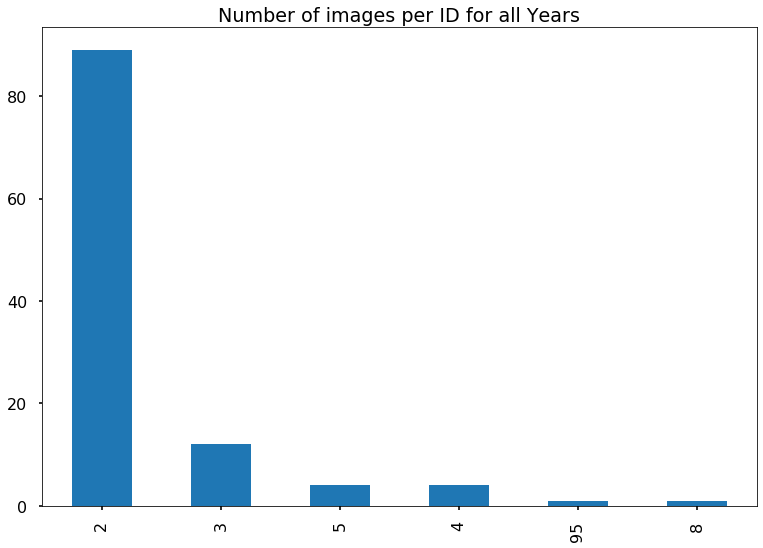

In [34]:
# Remove the outliers: All ids with only one image and All image with the id -1
value_counts = value_counts[1:-1]  # [1:-1] removed the first and last entry of the list. Check out https://stackoverflow.com/questions/509211/understanding-slice-notation for details.
value_counts.plot(kind='bar', title='Number of images per ID for all Years')

Still not perfect, but at least we have several hundred ids with two or more images. No matter which method we chose, it has to be able to work with very few training examples. We might even have to use [one-shot-learning](https://towardsdatascience.com/one-shot-learning-with-siamese-networks-using-keras-17f34e75bb3d).

<font color='blue'>
    
**Best practice:**
- Use images to condense and convey information. 
- Look for outliers. They tend to tell you the most about your data.
- Have a solid understanding of the tools you are working with (e.g. Python). Knowing the right library can save you a lot of time, reduce the possibility for errors and make your code easier to understand.

<a id='section2.7'></a>
## Summary

The EDA aims to give us an understanding of the problem we're trying to solve and allows us to pick the right algorithm. We learned

* The data was manually curated, with many different problems arising during the data cleaning. It is likely that there are still errors. **Report and discuss potential errors in our [teams channel](https://teams.microsoft.com/l/team/19%3a4017a2e9af4942e7aa157d6ec9d751b4%40thread.skype/conversations?groupId=7d77d672-dff1-4c9f-ac55-3c837c1bebf9&tenantId=76a2ae5a-9f00-4f6b-95ed-5d33d77c4d61)**.
* The data is very sparse. We have very few pictures for individual whales. The majority is only seen once.
* Every year, the majority of pictures show whales that are seen for the first time.

This is not an easy problem to solve. Let's see what we can do.

<a id='section3'></a>
# Measuring prediction quality

The goal of the challenge is simple: For each image in the [evaluation data set](https://capgemini.sharepoint.com/sites/GlobalDataScienceChallenge806/Shared%20Documents/Data%20Discussions/test_val.zip), create a list of similar images.

With this similarity prediction we are building a system that is able to make recommendations. The same concept is used for example at Amazon for product recommendations when you see something like "People who watched product A also watched product B".

The website shows a leaderboard where each teams is assigned a score. The higher the score, the better your ranking in the leaderboard. This section shows how the score is computed.

<a id='section3.1'></a>
## How to create a submission file

The format for predictions must be a csv where each line has the format:

*input_img, pred_1, pred_2, ...*

Where input_img is the input image and pred_1 is the image that according to our algorithm is the most similar picture to input_img. Respectively pred_2 is the image rated the second most similar, and so on.

In the [Gitlab repository](http://de-mucingode1.corp.capgemini.com/gitlab/SophieY/global_data_science_challenge_3_public) you will find a file named *train.csv* that shows how perfect predictions for the images in the [training data](https://capgemini.sharepoint.com/sites/GlobalDataScienceChallenge806/Shared%20Documents/Data%20Discussions/train.zip) would look like. For each image in the training data set, it lists all other images that show the same whale.

input_img | pic_1 | pic_2 | pic_3 | pic_4 | ...
:--- | :---: | :---: | :---: | :---: | :---:
PM-WWA-20050619-138.jpg | PM-WWA-20050618-064.jpg |    |  | | ...
PM-WWA-20050620-041.jpg | PM-WWA-20101022-049.jpg | PM-WWA-20110812-097.jpg | PM-WWA-20130607-211.jpg | PM-WWA-20130602-158.jpg | ...

The second line shows that the whale in *PM-WWA-20050620-041.jpg* can also be seen in the images *PM-WWA-20101022-049.jpg, PM-WWA-20110812-097.jpg, PM-WWA-20130607-211.jpg* and *PM-WWA-20130602-158.jpg*. 

<a id='section3.2'></a>
## Computing the score

Let's assume our predictions for the image 

*PM-WWA-20050620-041.jpg* are 

*PM-WWA-20101022-049.jpg, PM-WWA-20110812-097.jpg, PM-WWA-20130607-211.jpg, PM-WWA-20130602-158.jpg, wrong-pred-5.jpg, wrong-pred-6.jpg, wrong-pred-7.jpg, wrong-pred-8.jpg, wrong-pred-9.jpg, wrong-pred-10.jpg, wrong-pred-11.jpg, wrong-pred-12.jpg, wrong-pred-13.jpg, wrong-pred-14.jpg, wrong-pred-15.jpg, wrong-pred-16.jpg, wrong-pred-17.jpg, wrong-pred-18.jpg, wrong-pred-19.jpg, wrong-pred-20.jpg*.

I.e. our top four predictions are correct and everything afterwards is an image that shows a different whale. What would our score be for this line?

In [26]:
from src.score import get_submission_score  # You can find the source code in the file src/score.py

In [27]:
predictions = {'PM-WWA-20050620-041.jpg': ['PM-WWA-20101022-049.jpg', 'PM-WWA-20110812-097.jpg',
                                           'PM-WWA-20130607-211.jpg', 'PM-WWA-20130602-158.jpg', 'wrong-pred-5.jpg',
                                           'wrong-pred-6.jpg', 'wrong-pred-7.jpg', 'wrong-pred-8.jpg', 'wrong-pred-9.jpg',
                                           'wrong-pred-10.jpg', 'wrong-pred-11.jpg', 'wrong-pred-12.jpg', 'wrong-pred-13.jpg',
                                           'wrong-pred-14.jpg', 'wrong-pred-15.jpg', 'wrong-pred-16.jpg', 'wrong-pred-17.jpg',
                                           'wrong-pred-18.jpg', 'wrong-pred-19.jpg', 'wrong-pred-20.jpg']}
labels = {'PM-WWA-20050620-041.jpg': ['PM-WWA-20101022-049.jpg', 'PM-WWA-20110812-097.jpg',
                                      'PM-WWA-20130607-211.jpg', 'PM-WWA-20130602-158.jpg']}

In [28]:
get_submission_score(predictions, labels)

9.380952380952381

In this second example we changed the order of the predicted images. This has a major effect on the score:

In [29]:
predictions = {'PM-WWA-20050620-041.jpg': ['wrong-pred-19.jpg', 'PM-WWA-20130602-158.jpg', 'wrong-pred-8.jpg',
                                           'wrong-pred-16.jpg', 'PM-WWA-20110812-097.jpg', 'wrong-pred-5.jpg',
                                           'wrong-pred-6.jpg', 'wrong-pred-7.jpg', 'wrong-pred-9.jpg', 'wrong-pred-10.jpg',
                                           'wrong-pred-11.jpg', 'wrong-pred-12.jpg', 'wrong-pred-13.jpg','wrong-pred-14.jpg',
                                           'wrong-pred-15.jpg', 'PM-WWA-20130607-211.jpg', 'wrong-pred-17.jpg',
                                           'wrong-pred-18.jpg','PM-WWA-20101022-049.jpg', 'wrong-pred-20.jpg']}

In [30]:
get_submission_score(predictions, labels)

2.5714285714285716

A third example shows the importance of the top three predictions. Even though we only predicted two of the four matching images we get a higher score because two of the top three are correct.

In [40]:
predictions = {'PM-WWA-20050620-041.jpg': ['wrong-pred-1.jpg', 'PM-WWA-20110812-097.jpg',
                                           'PM-WWA-20130607-211.jpg', 'wrong-pred-4.jpg', 'wrong-pred-5.jpg',
                                           'wrong-pred-6.jpg', 'wrong-pred-7.jpg', 'wrong-pred-8.jpg', 'wrong-pred-9.jpg',
                                           'wrong-pred-10.jpg', 'wrong-pred-11.jpg', 'wrong-pred-12.jpg', 'wrong-pred-13.jpg',
                                           'wrong-pred-14.jpg', 'wrong-pred-15.jpg', 'wrong-pred-16.jpg', 'wrong-pred-17.jpg',
                                           'wrong-pred-18.jpg', 'wrong-pred-19.jpg', 'wrong-pred-20.jpg']}

In [41]:
get_submission_score(predictions, labels)

2.976190476190476

<a id='section3.3'></a>
## The math behind the score function

The previous section gave us an intuition of the score function. Now we will take a look at the actual formula.

*Note: This section is not essential. Feel free to skip over it.*

Both the order as well as the number of correct predictions have a major influence on the score.
In the examples the best score we can achieve is ~9.381. The score of the predictions for a single image is defined as:

$$score = 10 * f1{@1} + 5 * f1{@2} + 2 * f1{@3} + f1{@20}$$

with $$f1{@n} := 2 * \frac{(precision{@n} * recall{@n})}{(precision{@n} + recall{@n})}$$

and $n$ being the number of predictions taking into consideration. [F1](https://en.wikipedia.org/wiki/F1_score) is a very common metric that combines *precision* and *recall*. *Precision* is the percentage of the correct results that are relevant, *Recall* the percentage of the total relevant results that are predicted correctly. The *@n* suffix denotes that we only consider the *n* highest ranked results in the computation.

To get a better understanding of the score, we want to calculate the above example by hand. So we start calculating the F1 scores with:

$$precision{@n} = \frac{correct\_predictions{@n}}{n}$$
$$recall{@n} = \frac{correct\_predictions{@n}}{potential\_matches}$$

where $correct\_predictions{@n}$ is the number of matches in the top $n$ predicted images and $potential\_matches$ is the number of images showing the same whale. Therefore:

$$precision{@1}= \frac{1}{1} \;\;\;\;  recall{@1} = \frac{1}{4} \;\;\;\; f1{@1} = 2 * \frac{1 * \frac{1}{4}}{1 + \frac{1}{4}} = \frac{2}{5}$$;   
$$precision{@2} = \frac{2}{2} \;\;\;\;  recall{@2} = \frac{2}{4} \;\;\;\; f1{@2} = 2 * \frac{1 * \frac{2}{4}}{1 + \frac{2}{4}} = \frac{2}{3}$$;     
$$precision{@3} = \frac{3}{3} \;\;\;\;  recall{@3} = \frac{3}{4} \;\;\;\; f1{@3} = 2 * \frac{1 * \frac{3}{4}}{1 + \frac{3}{4}} = \frac{6}{7}$$;  
$$precision{@20} = \frac{4}{20} \;\;\;\;  recall{@20} = \frac{4}{4} \;\;\;\; f1{@20} = 2 * \frac{\frac{4}{20} * 1}{\frac{4}{20} + 1} = \frac{1}{3}$$

$$score = 10 * \frac{2}{5} + 5 * \frac{2}{3} + 2 * \frac{6}{7} + \frac{1}{3} = \frac{197}{27} \approx 9.38095$$

For the other two examples we can do the calculation similarly:

$$\text{Example 2:} \;\; score = 10 * 0 + 5 * \frac{1}{3} + 2 * \frac{2}{7} + \frac{1}{3} = \frac{18}{7} \approx 2.57143$$

$$\text{Example 3:} \;\; score = 10 * 0 + 5 * \frac{1}{3} + 2 * \frac{4}{7} + \frac{1}{6} = \frac{125}{42} \approx 2.97619$$

<a id='section3.4'></a>
## Summary

This section explain how the score for an individual picture is computed. The score on the leaderboard is the sum over all pictures in the test, resp. validation, data set.

* For each image in the [evaluation data set](https://capgemini.sharepoint.com/sites/GlobalDataScienceChallenge806/Shared%20Documents/Data%20Discussions/test_val.zip), you have to rank all other images by similarity. 
* The results on the leaderboard are computed by a score function that rewards the correct order of your predictions. 
* The score function considers the first 20 predictions with the top three being the most important.